In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
def create_dataframe(traning_df):
    #features_df = traning_df.drop(['Gross PI Premium'],axis=1)
    features_df = traning_df
    features_df['Gross PI Premium'] = features_df['Gross PI Premium'].fillna(features_df['Gross PI Premium'].mean())
    features_df['Gross PI Premium'] = features_df['Gross PI Premium'] + 1000
    features_df['Commission Amount'] = features_df['Commission Amount'] + 500
    
    integer_encoding_system = {'Source System':{'Simple':0,'Custom':1}}
    features_df.replace(integer_encoding_system,inplace=True)
    
    #features_df['Product'] = features_df['Product'].astype('category')
    #features_df['Product_cat'] = features_df['Product'].cat.codes
    
    #Match Type one hot encoding
    match_dummies=pd.get_dummies(features_df[['Match Type']]) #Title
    features_df = pd.concat([features_df, match_dummies], axis=1)
    features_df.drop(['Match Type'],axis=1,inplace=True)
    
    # product one hot encoding
    Product_dummies=pd.get_dummies(features_df[['Product']]) #Title
    features_df = pd.concat([features_df, Product_dummies], axis=1)
    
    features_df.drop(['Product'],axis=1,inplace=True)
    features_df.drop(['Product_TradeE'],axis=1,inplace=True)

    
    features_df['Transaction Type'] = features_df['Transaction Type'].replace('New Business','New business')
    features_df['Transaction Type'] = features_df['Transaction Type'].astype('category')
    features_df['Transaction_Type_Cat'] = features_df['Transaction Type'].cat.codes
    features_df.drop(['Transaction Type'],axis=1,inplace=True)
    
    # one hot encoing for trade 1 category
    Trade_1_dummies=pd.get_dummies(features_df[['Trade 1 Category']]) #Title
    features_df = pd.concat([features_df, Trade_1_dummies], axis=1)
    
    # drop trade 1 category
    features_df = features_df.drop(['Trade 1 Category'],axis=1)
    # dropping one more variable from category to avoid dummy variable trap
    features_df = features_df.drop(['Trade 1 Category_Transport'],axis=1)
    
    features_df.rename(mapper={'Gross PI Premium':'Gross_PI_Premium',
                                'Commission Amount':'Commission_Amount',
                               'Clerical EE':'Clerical_EE',
                              'Source System' : 'Source_System', 
                            'Underwriting Year': 'Underwriting_Year',
                            'Public Liability Limit' : 'Public_Liability_Limit', 
                            'Employers Liability Limit': 'Employers_Liability_Limit',
                            'Tools Sum Insured': 'Tools_Sum_Insured',
                            'Professional Indemnity Limit' : 'Professional_Indemnity_Limit',
                            'Contract Works Sum Insured': 'Contract_Works_Sum_Insured',
                            'Hired in Plan Sum Insured' : 'Hired_in_Plan_Sum_Insured',
                            'Own Plant Sum Insured': 'Own_Plant_Sum_Insured', 
                            'Manual EE' : 'Manual_EE', 
                            'Subcontractor EE' : 'Subcontractor_EE',
                            'Trade 1 Risk Level' : 'Trade_1_Risk_Level', 
                            'Trade 2 Risk Level' : 'Trade_2_Risk_Level', 
                            'Commission Amount' : 'Commission_Amount',
                              'Trade 1 Category_Arts & Crafts' : 'Category_Arts_Crafts',
                               'Trade 1 Category_Building/Allied': 'Category_Building/Allied', 
                               'Trade 1 Category_Catering':'Category_Catering',
                               'Trade 1 Category_Cleaning':'Category_Cleaning', 
                               'Trade 1 Category_Decline':'Category_Decline',
                               'Trade 1 Category_Decorators/Flooring':'Category_Decorators_Flooring', 
                               'Trade 1 Category_Electrical':'Category_Electrical',
                               'Trade 1 Category_Groundwork/Allied':'Category_Groundwork',
                               'Trade 1 Category_HVAC/Mech/Allied':'Category_HVAC',
                               'Trade 1 Category_Insulation/Treatment':'Category_Insulation',
                               'Trade 1 Category_Professional':'Category_Professional',
                               'Trade 1 Category_Professional/ Surveying':'Category_Professional_Surveying',
                               'Trade 1 Category_Security':'Category_Security',
                               'Trade 1 Category_Service':'Category_Service',
                               'Trade 1 Category_Sport':'Category_Sport',
                               'Match Type_0':'Type_0',
                               'Match Type_0.1':'Type_01', 
                              'Match Type_1': 'Type_1', 
                               'Match Type_10':'Type_10', 
                               'Match Type_5':'Type_5',
                               'Match Type_Min Premium':'Type_Min_Premium', 
                                'Match Type_Not Found':'Type_Not_Found', 
                               'Match Type_Trade Error':'Type_Trade_Error'
                               #,'Trade 1 Category_Transport':'Category_Transport'
                              },axis=1,inplace=True)

    return features_df

In [3]:
traning_df = pd.read_csv(r'C:\Users\rohishah\Desktop\DLAB\First_set.csv')

In [4]:
traning_df = traning_df.reindex(np.random.permutation(traning_df.index))
selected_col_df = create_dataframe(traning_df)

In [5]:
selected_features = ['Source_System','Transaction_Type_Cat',
       'Public_Liability_Limit', 'Employers_Liability_Limit',
       'Tools_Sum_Insured', 'Professional_Indemnity_Limit',
       'Contract_Works_Sum_Insured', 'Hired_in_Plan_Sum_Insured',
       'Own_Plant_Sum_Insured', 'Manual_EE',  'Subcontractor_EE',
       'Trade_1_Risk_Level', 'Trade_2_Risk_Level', 'CombinedTradeRiskLevel',
       'Public_Liability_Limit_1000000', 'Public_Liability_Limit_5000000',
       'Public_Liability_Limit_1000000.2',
        'Employers_Liability_Limit_1000',
        'Professional_Indemnity_Limit_5.1',
       'Professional_Indemnity_Limit_1', 'Professional_Indemnity_Limit_1.1',
       'Professional_Indemnity_Limit_2', 'Professional_Indemnity_Limit_2.1', 'Professional_Indemnity_Limit_5.3',
       'Professional_Indemnity_Limit_1.2', 'Professional_Indemnity_Limit_1.3',
       'Professional_Indemnity_Limit_2.2', 'Professional_Indemnity_Limit_2.3',
       'Tools_Sum_Insured_Ind', 'Contract_Works_Sum_Insured_Ind',
       'Hired_in_Plan_Sum_Insured_Ind', 'Own_Plant_Sum_Insured_Ind',
       'Public_Liability_Limit_5000000.2',
       'Professional_Indemnity_Limit_g', 'TotalEmployees', 'Product_TradeA',
       'Product_TradeB', 'Product_TradeC', 'Product_TradeD']
selected_target = ['Target3']

In [6]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:.1f}'.format

In [7]:
def preprocess_features(Stores_data_frame):
    selected_featur = Stores_data_frame[selected_features]
    processed_features = selected_featur.copy()
     # Create a synthetic feature.
    return processed_features

In [8]:
def preprocess_targets(Stores_data_frame):
    output_targets = pd.DataFrame()
    output_targets[target] =Stores_data_frame[target] 
    return output_targets

In [9]:
def construct_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [10]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [11]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets,
    my_optimizer,
    hidden_units):
    
    periods = 10
    steps_per_period = steps / periods
  
  # Create a linear classifier object.
    my_optimizer = my_optimizer
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    dnn_regressor = tf.estimator.DNNRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer,
      hidden_units=hidden_units)
   
  
  # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets[selected_target], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets[selected_target], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets[selected_target], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
    print ("Training model...")
    print ("RMSE (on Test data):")
    root_mean_squared_errors = []
    for period in range (0, periods):
        
        dnn_regressor.train(input_fn=training_input_fn,
                                steps=steps_per_period)
       # Take a break and compute predictions.
        predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        predictions = np.array([item['predictions'][0] for item in predictions])
        # Compute loss.
        root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(predictions, training_targets))
        # Occasionally print the current loss.
        print(period, root_mean_squared_error)
        # Add the loss metrics from this period to our list.
        root_mean_squared_errors.append(root_mean_squared_error)
        
    print ("Model training finished.")
    
  
   # Output a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)
    
    print (root_mean_squared_error)
    return dnn_regressor

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def log_normalize(series):
    return series.apply(lambda x:math.log(x+1.0))

In [14]:
def normalize_log(examples_dataframe):
    processed_features = pd.DataFrame()
    for feature in examples_dataframe:
        processed_features[feature] = log_normalize(examples_dataframe[feature])
    return processed_features

In [15]:
def preprocess_features_log(example_data_frame,all_features):
    all_features = example_data_frame[all_features]
    processed_features = all_features.copy()
     # Create a synthetic feature.
    return processed_features

In [16]:
log_normalize_file =preprocess_features_log(normalize_log(preprocess_features_log(selected_col_df,selected_features)),
                                            selected_features)

training_examples, validation_examples, training_targets, validation_targets = train_test_split(log_normalize_file[selected_features], selected_col_df[selected_target],
                                                    test_size = 0.3, random_state = 1)

Training model...
RMSE (on Test data):
0 160.0028730252104
1 159.98129219870177
2 159.95186857108823
3 159.88804257214647
4 159.92888729706343
5 159.9194909885169
6 159.89625334978274
7 159.91142945956736
8 159.97468588738133
9 159.86855139716008
Model training finished.
159.86855139716008


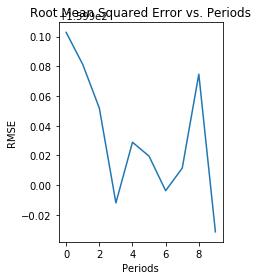

In [17]:
linear_regressor = train_linear_classifier_model(
    learning_rate=0.01,
    steps=500,
    batch_size=100,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets,
    my_optimizer = tf.train.AdamOptimizer(learning_rate=0.01),
    hidden_units=[50,50])

In [18]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets[selected_target], 
                                                    num_epochs=1, 
                                                    shuffle=False)

In [19]:
predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
predictions = np.array([item['predictions'][0] for item in predictions])

In [20]:
root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(predictions, validation_targets[selected_target]))

In [21]:
print(root_mean_squared_error)

33.85192035698331


In [22]:
for item in predictions:
    print(item)

0.939425
7.62234
6.10944
-0.383062
17.6038
1.9328
4.22394
7.40427
2.12619
12.9474
-0.0122468
1.60091
6.07336
-0.254019
7.9533
6.12678
18.9519
1.15167
4.79017
1.42856
17.8364
10.5989
8.07622
9.44259
3.87308
14.2484
15.5554
9.11083
6.55036
4.54164
6.93899
3.11617
2.40895
6.0494
7.49021
4.87023
6.51669
12.2802
6.10342
9.53529
-0.254019
-0.581679
19.1229
3.96007
2.26412
8.43497
0.988123
4.87741
17.5432
7.16086
17.9985
1.07518
-0.474843
5.77933
4.22394
2.10176
-0.354941
8.40963
4.95528
4.57083
1.29818
4.22394
8.86036
7.04523
2.48992
3.7842
3.49818
1.48527
-0.767203
4.57083
15.415
6.19433
4.54164
-0.522615
4.49603
-0.0122468
2.46834
4.0544
0.304393
1.15167
2.45219
17.7505
3.30132
5.2502
3.9175
15.6816
4.17928
8.292
4.62706
9.01055
2.68567
8.83569
-0.288671
6.67435
7.80357
13.6327
10.6165
13.5047
6.21977
13.8333
4.92464
4.37042
0.17622
3.17686
8.71047
10.4042
0.916238
3.97405
6.93165
3.7842
16.6834
5.64914
-0.34337
5.93398
2.63098
7.42908
1.1307
3.7842
16.7855
2.24404
0.314456
3.43898
-0.2898

6.08777
9.06411
5.9146
8.03455
-0.379249
10.6811
11.972
13.4876
12.459
1.07558
7.06878
6.94334
2.86912
4.63862
0.674111
6.32592
15.4359
1.1564
11.7632
0.652472
2.86912
2.64695
-0.0541929
6.61082
16.2851
1.23836
2.69053
2.94839
9.17517
12.5797
4.47599
4.53002
5.85596
1.73969
2.27567
9.79534
4.54164
5.03914
-0.737376
8.8667
20.1962
4.85355
2.51646
3.90053
0.258695
4.88741
7.21998
6.48402
5.30722
9.31228
4.29223
2.50912
5.17981
3.50004
5.07851
7.62003
3.50501
16.3021
11.2701
7.74081
4.34229
5.71811
0.569785
31.2701
-0.46339
8.42985
3.66749
25.9485
7.83763
4.97282
5.52805
-0.432892
17.1432
7.35925
12.5232
8.29191
9.21722
7.05214
7.883
0.200693
26.2385
7.42536
0.416223
4.47599
-0.696657
3.7842
-0.740766
9.52977
17.3872
-0.0122468
6.28217
1.94854
4.33849
5.64914
2.84544
6.55036
20.1461
0.940045
-0.756841
8.60905
11.3812


In [23]:
validation_targets['Target3']

4369    0.0
1203    2.4
3350    0.0
3573    0.0
4624    0.0
886     0.5
3069    0.0
1692    0.5
3286    0.0
329     5.2
2603    0.0
3314    0.0
1875    3.5
4616    0.0
1657   66.0
1252   31.2
3860    0.0
2416    0.0
2226    1.2
1239    0.8
3343    0.0
1502    1.0
1508    0.7
1201    0.6
2662    0.0
       ... 
1104    0.3
4741    0.0
591    85.4
1776    0.7
893     0.9
2065   44.0
4490    0.0
1745    8.4
2427    0.0
1487   13.6
3252    0.0
401     0.6
4056    0.0
3257    0.0
144     8.5
4448    0.0
1494    2.8
156    20.8
3313    0.0
46     13.4
1679    0.3
4063    0.0
3132    0.0
772     6.1
1411   48.8
Name: Target3, Length: 1440, dtype: float64